In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Import dataset
csv = "datasets/OrderReports.csv"
df_order = pd.read_csv (csv, header=0)

In [15]:
print(df_order.isnull().sum())

Date                      0
Order #                   0
N. Revenue (formatted)    0
Status                    0
Customer                  0
Customer type             0
Product(s)                0
Items sold                0
N. Revenue                0
State                     0
Age                       0
Gender                    0
dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder

data_column_category = df_order.select_dtypes (exclude=[np.number]).columns

label_encoder = LabelEncoder()
for i in data_column_category:
  df_order[i] = label_encoder.fit_transform (df_order[i])

print("Label Encoder Data:")
print(df_order.head(50))

Label Encoder Data:
    Date  Order #  N. Revenue (formatted)  Status  Customer  Customer type  \
0   8008  16698.0                     176       1        19              0   
1   8007  16697.0                     150       1      1991              0   
2   8006  16696.0                     150       1      6993              0   
3   8005  16695.0                     198       1      1763              0   
4   8004  16694.0                     150       1      6114              0   
5   8003  16693.0                     134       1      5020              0   
6   8002  16692.0                     164       1       520              0   
7   8001  16691.0                      15       0      3168              0   
8   8000  16690.0                     150       0      6004              0   
9   7999  16689.0                     150       0      5653              0   
10  7998  16688.0                      34       0      6014              1   
11  7997  16687.0                      39   

In [17]:
# Choose state, age & gender column
segment_col = df_order.iloc[:,9:12].values
print(segment_col)

[[ 8 36  0]
 [ 0 25  0]
 [ 4 31  0]
 ...
 [ 7 35  0]
 [ 6 34  0]
 [ 9 37  0]]


Choose the correct number of cluster

In [18]:
# Finding WCSS value for different number of cluster

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  df_order['Cluster'] = kmeans.fit(segment_col)

  wcss.append(kmeans.inertia_)

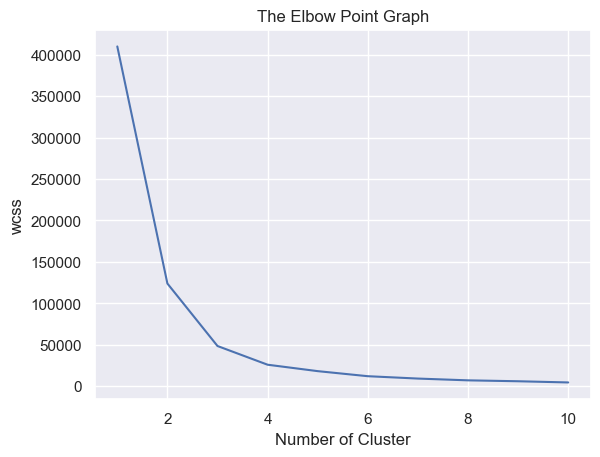

In [19]:
# Plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

Optimum Number of Cluster = 4

In [20]:
# Training the k-Means Clustering Model
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# Return a label for each data point based on their cluster
cluster = kmeans.fit_predict(segment_col)

print(cluster)

print(set(cluster))

[2 3 0 ... 2 0 2]
{0, 1, 2, 3}


In [21]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(segment_col, cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6039300411092535


In [22]:
# Visualising the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df_order, hue=cluster, palette='tab10')
plt.title('Segmentation KMeans')
plt.show()


ValueError: Could not interpret value `Annual Income (k$)` for parameter `y`

<Figure size 1000x700 with 0 Axes>